In [1]:
import pandas as pd
import numpy as np
import cv2

from PIL import Image, ImageStat
from matplotlib import pyplot as plt

In [820]:
def edge_detection(img_np):
    img = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
#     img = cv2.blur(img, (3,3))
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.Canny(img, threshold1=50, threshold2=200, apertureSize=5)
#     img = cv2.blur(img, (2,2))
    img = cv2.blur(img, (3,3))
    return img

In [821]:
# paths
path_icons = './icons/'
path_images = './images/'

In [840]:
# load inventory image
img_inventory = Image.open(path_images + 'inventar3.png')
img_inventory_np = np.asarray(img_inventory)

In [841]:
# edge detection
img_inventory_np_gray = cv2.cvtColor(img_inventory_np, cv2.COLOR_BGR2GRAY)
img_inventory_np_edge = edge_detection(img_inventory_np)

In [842]:
# slot detection
img_slot = Image.open(path_images + 'slot_empty.png')
img_slot_np = np.asarray(img_slot)
img_slot_np_gray = cv2.cvtColor(img_slot_np, cv2.COLOR_BGR2GRAY)
img_slot_np_edge = edge_detection(img_slot_np)


In [843]:
img = img_inventory_np_edge.copy()
img2 = img_inventory_np_edge.copy()

hor_struct = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))

cv2.erode(img, hor_struct, img)
cv2.dilate(img, hor_struct, img)

ver_struct = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))

cv2.erode(img2, ver_struct, img2)
cv2.dilate(img2, ver_struct, img2)

# result = cv2.bitwise_and(img, img2)
result = cv2.add(img, img2)

# kernel = np.array([[0, -1, 0],
#                    [-1, 5,-1],
#                    [0, -1, 0]])
# result = cv2.filter2D(src=result, ddepth=-1, kernel=kernel)

# result = cv2.blur(result, (5,5))
# (thresh, result) = cv2.threshold(result, 70, 255, cv2.THRESH_BINARY)

In [887]:
## template matching
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# res = []
# for meth in methods:
#     res.append(cv2.matchTemplate(result, img_slot_np_gray, eval(meth)))
# best = res[3]
best = cv2.matchTemplate(result, img_slot_np_gray, cv2.TM_CCORR_NORMED)

## find best positions
threshold = 0.7
img_slots = img_inventory_np.copy()
slots = []
for y in range(best.shape[0]):
    for x in range(best.shape[1]):
        if best[y][x] > threshold:
#             img_slots = cv2.circle(img_slots, (x, y), radius=5, color=(255,0,0), thickness=-1)
            slots.append((x,y))
    
lastx = 0
lasty = 0
threshold = 50
for x,y in slots:
    if abs(x-lastx) > threshold or abs(y-lasty) > threshold:
        img_slots = cv2.circle(img_slots, (x, y), radius=5, color=(255,0,0), thickness=-1)
        lastx = x
        lasty = y

In [888]:
start_x = (int) (1920/3)
start_y = 100
threshold = 10



result = cv2.circle(result, (start_x, start_y), radius=5, color=(255,0,0), thickness=-1)

In [889]:
# Image.fromarray(img_inventory_np_edge)

In [890]:
# Image.fromarray(result)

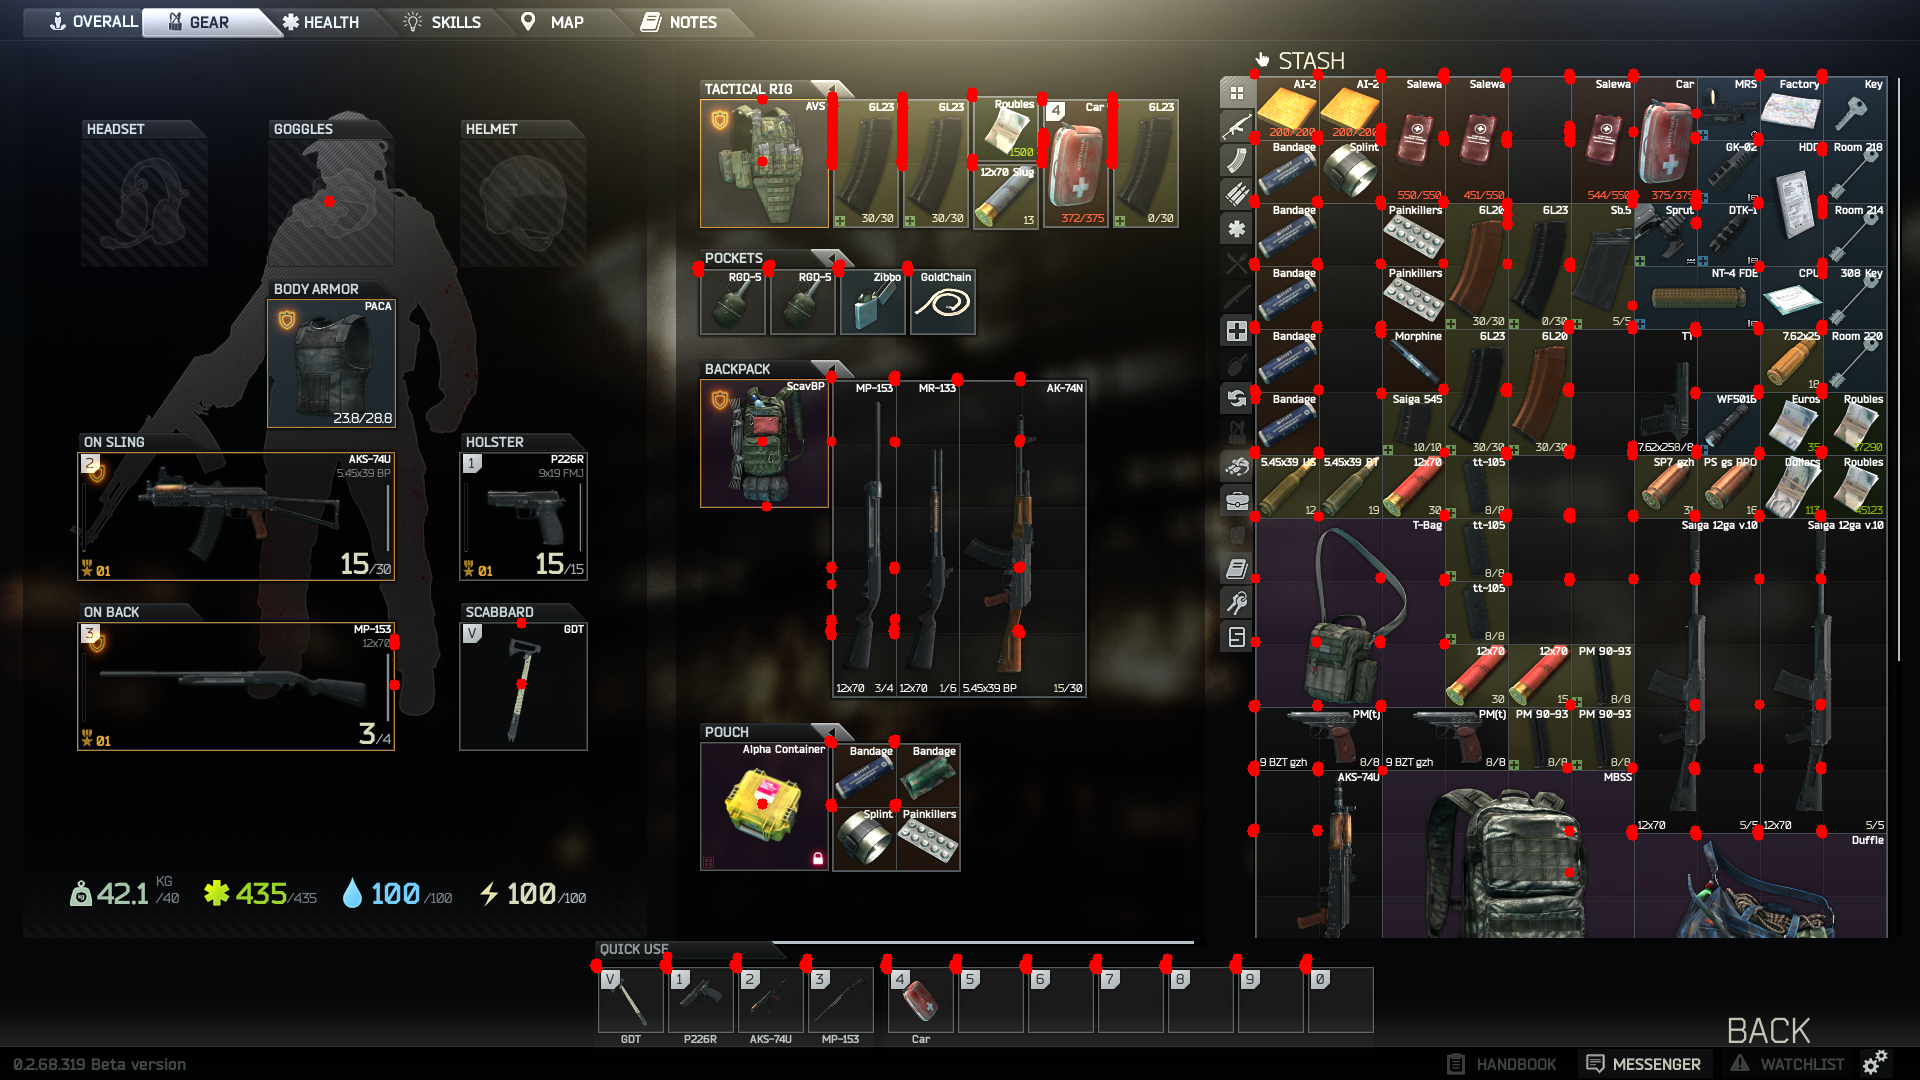

In [891]:
# Image.fromarray(img_slot_np_edge)
# Image.fromarray(res)
# plt.imshow(res[3], cmap='gray')
Image.fromarray(img_slots)
# Image.fromarray(hough)
